**Import required packages**

In [6]:
from portbalance import *
import io

## For debugging
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initialize a portfolio

In [7]:
## Load a portfolio
inline_txt = io.StringIO("""
SCHB, 150, 01/20/2015, 45.41
VTI, 60, 01/26/2015, 98.28
VXUS, 90, 03/20/2015, 45.78
SCHB, 150, 03/20/2015,
VWO, 10, 04/20/2015,
VTI, 8, 04/20/2015, 46.83
""")

# inline_txt = io.StringIO("""
# SCHB, 150, 01/20/2015, 45.41
# VTI, 60, 01/26/2015, 98.28
# VTV, 90, 03/20/2015, 45.78
# VOE, 43, 03/20/2015,
# VBR, 23, 04/20/2015,
# VEA, 170, 04/20/2015,
# VWO, 100, 04/20/2015,
# VXUS, 220, 04/20/2015,
# """)
# my_portfolio = Portfolio(inline_txt)


my_portfolio = Portfolio(inline_txt)

## Alternative: load from an external CSV file in the working directory
# port = Portfolio('../resources/sample_portfolio.txt')

print(my_portfolio)

  Ticker  NumShares         Date   BuyPrice  CurrentPrice
0   SCHB        150   01/20/2015  45.410000         73.27
1    VTI         60   01/26/2015  98.280000        155.83
2   VXUS         90   03/20/2015  45.780000         53.95
3   SCHB        150   03/20/2015  47.219986         73.27
4    VWO         10   04/20/2015  38.250258         42.50
5    VTI          8   04/20/2015  46.830000        155.83


## Calculate historical performance

In [8]:
print("Net return on principal:", my_portfolio.calculate_performance())

Net return on principal: 0.5346585469336369


## Initialize a target allocation / strategy

In [9]:
## Pick a strategy (alternatively, can also write your own as a dict())
my_strategy = get_strategy('Betterment2018', stock_ratio=1.0)

## Calculate purchases needed for rebalancing 

In [10]:
### Run gradient descent for a specified budget
buying_budget = 5e5
my_buys, drift_final, leftover_cash = my_portfolio.find_investing_strategy(buying_budget, my_strategy)

### Print output
print("Investing strategy:")
for key in my_buys:
    print (key,':',my_buys[key])

print('\nResidual balance: ', leftover_cash)

print('\nResidual drift: ', str(100*drift_final),'%')

Investing strategy:
VTV : 440
VOE : 361
VWO : 952
VEA : 1628
SCHB : 996
VBR : 263
VXUS : 1954
VTI : 542

Residual balance:  3.639999945065938

Residual drift:  0.03687047426190332 %


## Make plots showing convergence of rebalancing (Optional)

Investing strategy:
VTV : 440
VOE : 361
VWO : 952
VEA : 1628
SCHB : 996
VBR : 263
VXUS : 1954
VTI : 542


Text(0, 0.5, 'Total portfolio drift')

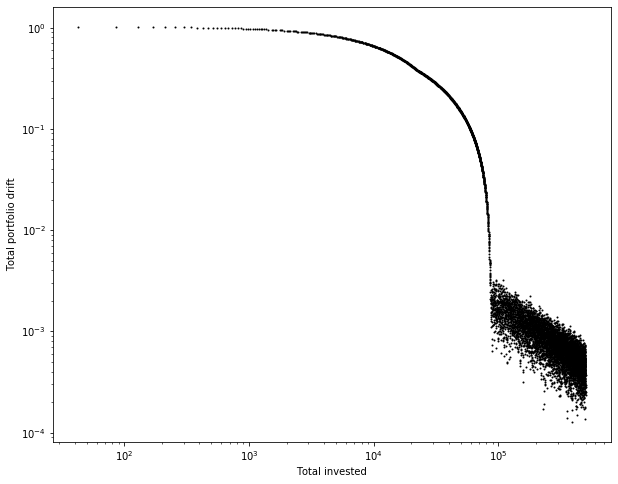

In [11]:
buying_budget = 5e5
my_buys, drift_series, cash_series = my_portfolio.find_investing_strategy(buying_budget, my_strategy, verbose=True)

print("Investing strategy:")
for key in my_buys:
    print (key,':',my_buys[key])

    
## Figure plotting and formatting
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.figure()
plt.loglog(buying_budget - cash_series[1:], drift_series,'.k', markersize=2)
plt.xlabel('Total invested')
plt.ylabel('Total portfolio drift')

In [12]:
%%bash

ls

demo.ipynb
